In [23]:
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
df=pd.read_csv("datasets/smartcart_customers.csv")

In [25]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [26]:
df.shape

(2240, 22)

### Handle missing values

In [27]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

In [28]:
df["Income"]=df["Income"].fillna(df["Income"].median())

In [29]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

### Feature engineering

In [30]:
#finding age
df["Age"]=2026-df["Year_Birth"]

In [31]:
#finding tenure days
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],dayfirst=True)
reference_date=df["Dt_Customer"].max()
df["Customer tenure days"]=(reference_date-df["Dt_Customer"]).dt.days

In [32]:
#total spending on children
df["Total_spending"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [33]:
#total number of children
df["Total_children"]=df["Kidhome"]+df["Teenhome"]


In [34]:
#education 
df["Education"]=df["Education"].replace({
    "Basic":"Undergraduate","2n Cycle":"Undergraduate",
    "Graduation":"Graduate",
    "Master":"PostGraduate","PhD":"PostGraduate",
})
    

In [36]:
#Maritral Status
df["Living_with"]=df["Marital_Status"].replace({
    "Married":"partner","Together":"partner",
    "Single":"Alone","Divorced":"Alone","Widow":"Alone",
    "Alone":"Alone","Absurd":"Alone","YOLO":"Alone",
})   

### Drop Columns

In [37]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer tenure days', 'Total_spending',
       'Total_children', 'Living_with'],
      dtype='object')

In [40]:
cols=["ID","Year_Birth","Marital_Status","Kidhome","Teenhome","Dt_Customer"]
spending_cols=["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
cols_to_drop=cols+spending_cols
df_cleaned=df.drop(columns=cols_to_drop)

In [41]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer tenure days,Total_spending,Total_children,Living_with
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,partner
4,PostGraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,partner


In [42]:
df_cleaned.shape

(2240, 15)

In [43]:
df.shape

(2240, 27)

### Outliers

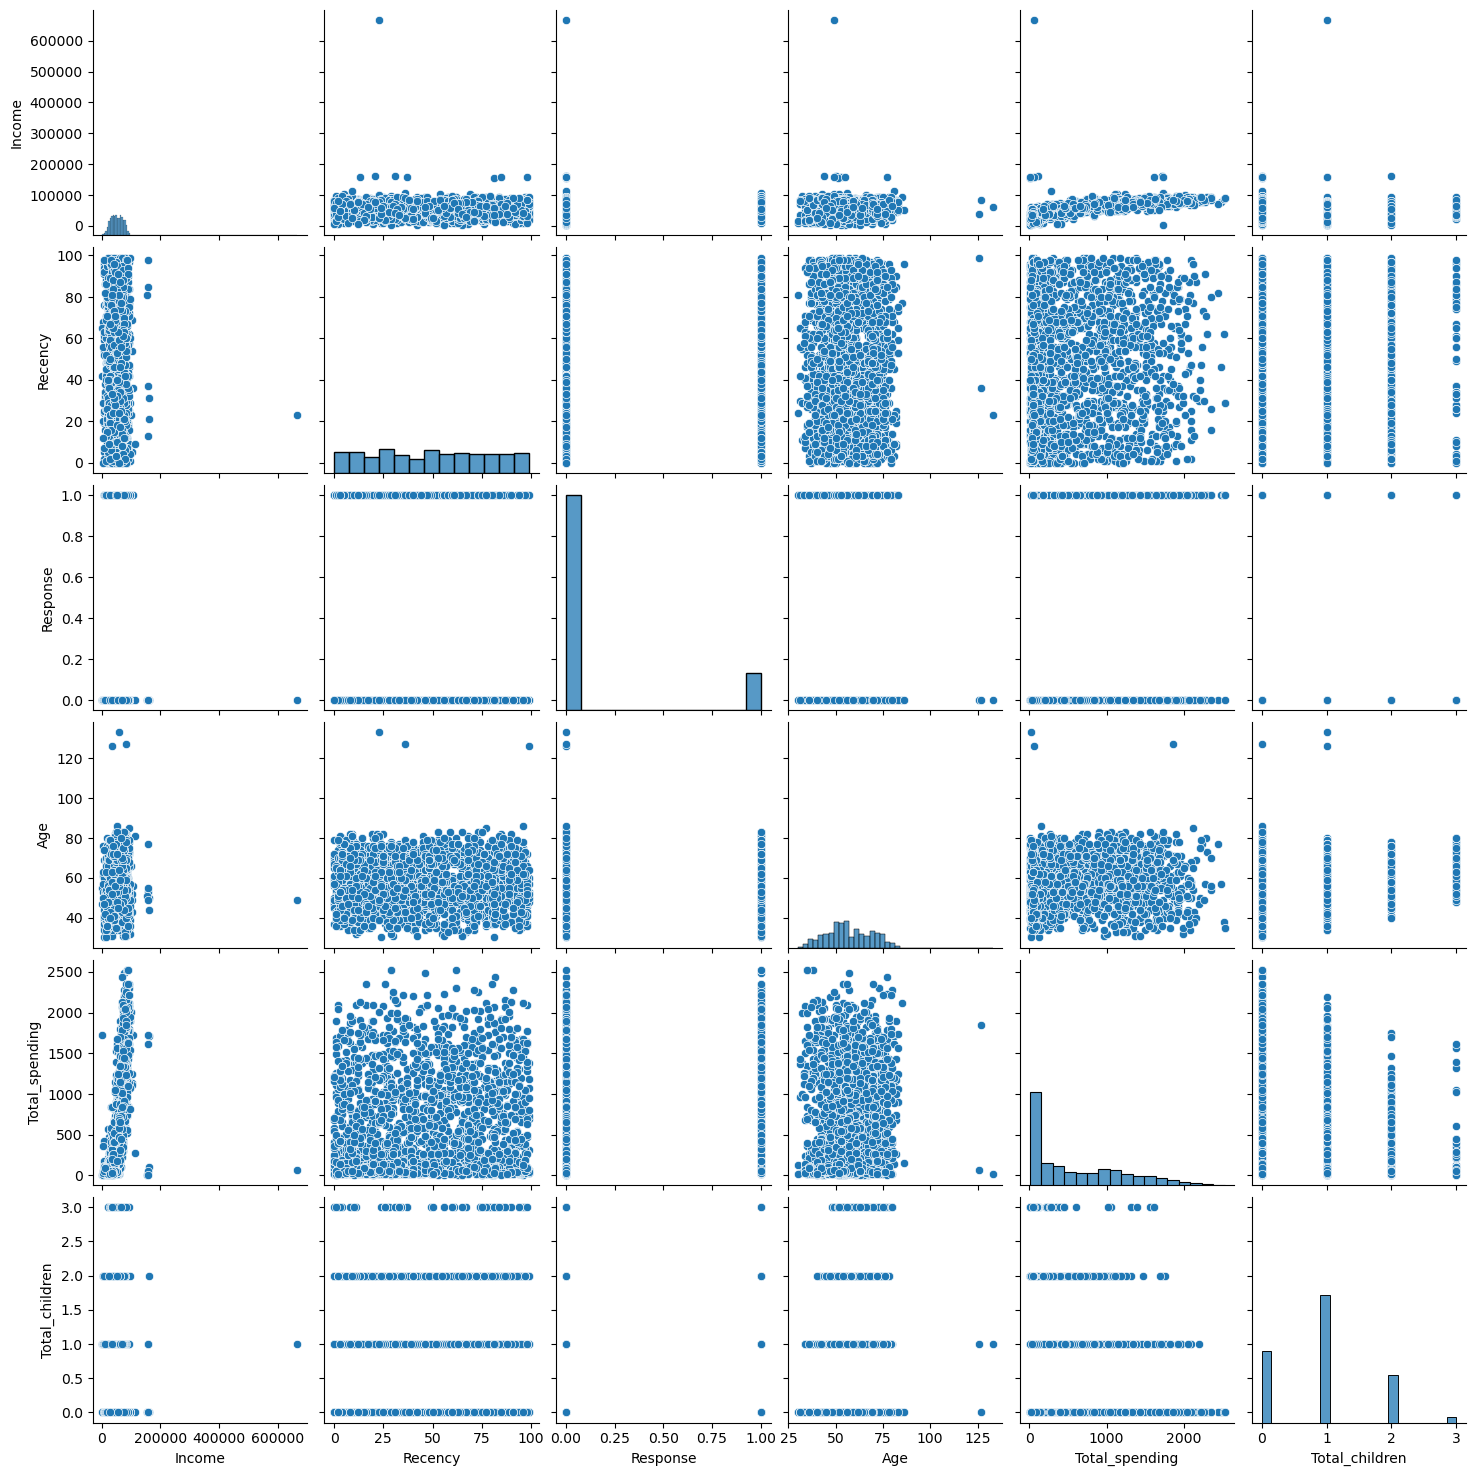

In [44]:
cols=["Income","Recency","Response","Age","Total_spending","Total_children"]
sns.pairplot(df_cleaned[cols])

In [49]:
#remove outliers
df_cleaned=df_cleaned[(df_cleaned["Age"] <90)]
df_cleaned=df_cleaned[(df_cleaned["Income"] <600_000)]
print("data without outliers:",len(df_cleaned))

data without outliers: 2236


### Heatmap

In [50]:
corr=df_cleaned.corr(numeric_only=True)

<Axes: >

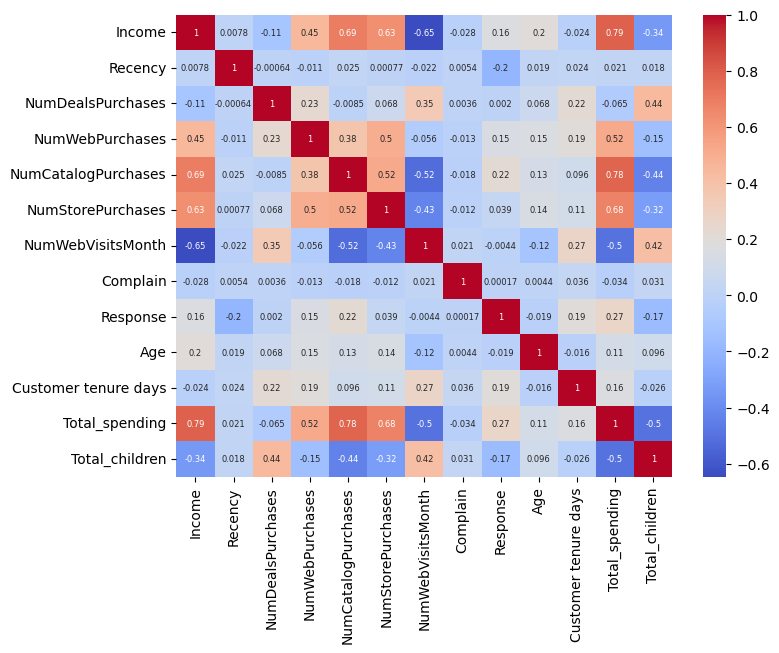

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    annot_kws={"size":6},
    cmap="coolwarm"
)
#0.79 income --Total spending
#0.69 income--catalog purchase
#0.6 income --store purchases
#-0.65 income high -- they wont purchase on webvisits
#0.78 total_spending high on ---catalog purchases
#0.68 total_spending high on ---store purchases

### Feature Encoding

In [52]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
cat_cols=["Education","Living_with"]
enc_cols=ohe.fit_transform(df_cleaned[cat_cols])

In [53]:
enc_df=pd.DataFrame(enc_cols.toarray(),columns=ohe.get_feature_names_out(cat_cols),index=df_cleaned.index)

In [54]:
enc_df.head()

,Education_Graduate,Education_PostGraduate,Education_Undergraduate,Living_with_Alone,Living_with_partner
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [55]:
df_encoded=pd.concat([df_cleaned.drop(columns=cat_cols),enc_df],axis=1)

In [56]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer tenure days,Total_spending,Total_children,Education_Graduate,Education_PostGraduate,Education_Undergraduate,Living_with_Alone,Living_with_partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


In [ ]:
df_encoded.shape

In [57]:
X=df_encoded

### Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### Visualize

In [74]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X_scaled)

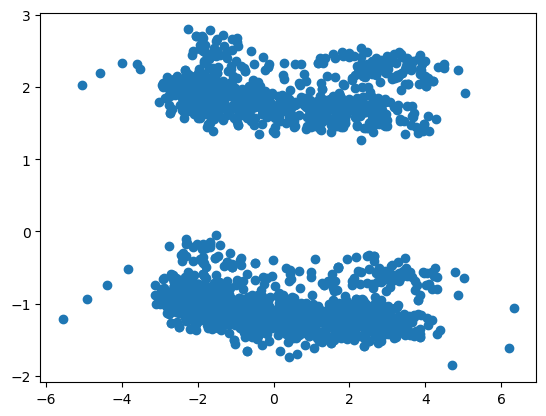

In [60]:
plt.scatter(X_pca[:,0],X_pca[:,1])

### Analyze k value 
### 1.Elbow method

In [61]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)
    

C:\Users\abbur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\abbur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\abbur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\abbur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [62]:
knee=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
optimal_k=knee.elbow

In [64]:
print("best k value:",optimal_k)

best k value: 4


Text(0, 0.5, 'Wcss')

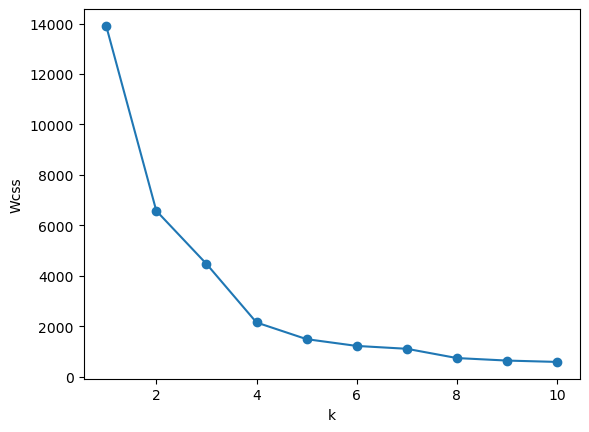

In [66]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("k")
plt.ylabel("Wcss")

In [68]:
from sklearn.metrics import silhouette_score
scores=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    labels=kmeans.fit_predict(X_pca)
    score=silhouette_score(X_pca,labels)
    scores.append(score)

C:\Users\abbur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\abbur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\abbur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\abbur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Wcss')

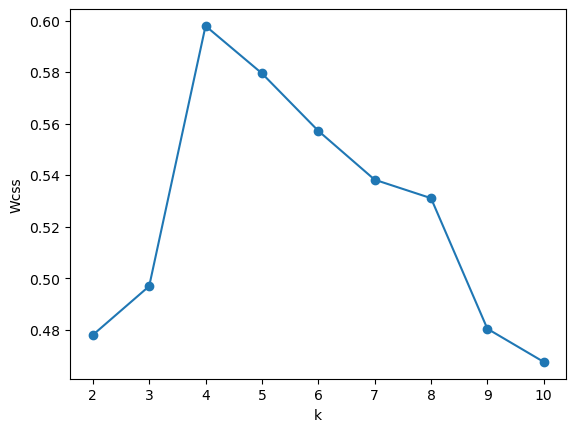

In [69]:
plt.plot(range(2,11),scores,marker='o')
plt.xlabel("k")
plt.ylabel("Wcss")

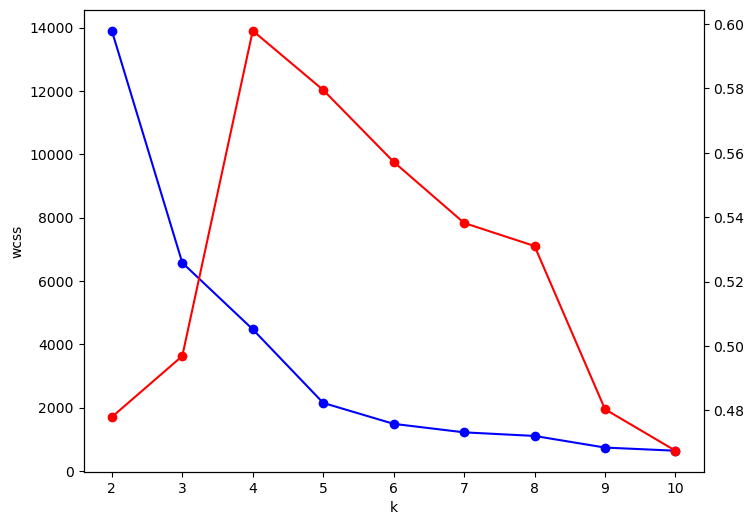

In [71]:
k_range=range(2,11)
fig,ax1=plt.subplots(figsize=(8,6))

ax1.plot(k_range,wcss[:len(k_range)],marker="o",color="blue")
ax1.set_xlabel("k")
ax1.set_ylabel("wcss")

ax2=ax1.twinx()
ax2.plot(k_range,scores[:len(k_range)],marker="o",color="red")

### Clustering

In [72]:
kmeans=KMeans(n_clusters=4,random_state=42)
label_kmeans=kmeans.fit_predict(X_pca)

C:\Users\abbur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


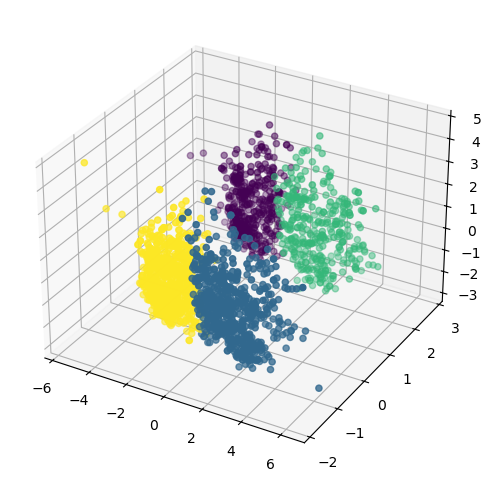

In [75]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")

ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=label_kmeans)

In [76]:
from sklearn.cluster import AgglomerativeClustering
agg_clf=AgglomerativeClustering(n_clusters=4,linkage="ward")
labels_agg=agg_clf.fit_predict(X_pca)

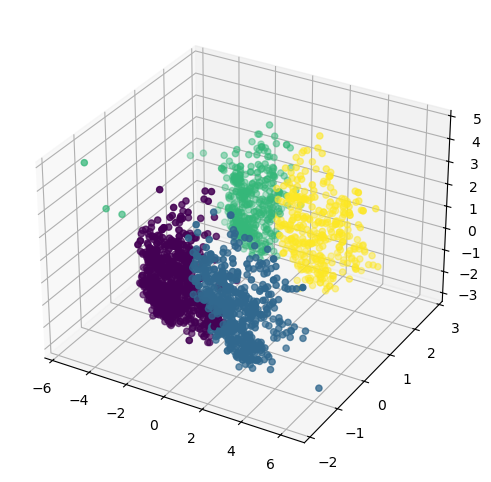

In [78]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")

ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=labels_agg)

### Characterization of clusters

In [94]:
df_cleaned.drop("labels",axis=1)
X["clusters"]=labels_agg

In [95]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer tenure days,Total_spending,Total_children,Education_Graduate,Education_PostGraduate,Education_Undergraduate,Living_with_Alone,Living_with_partner,clusters
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='clusters', ylabel='count'>

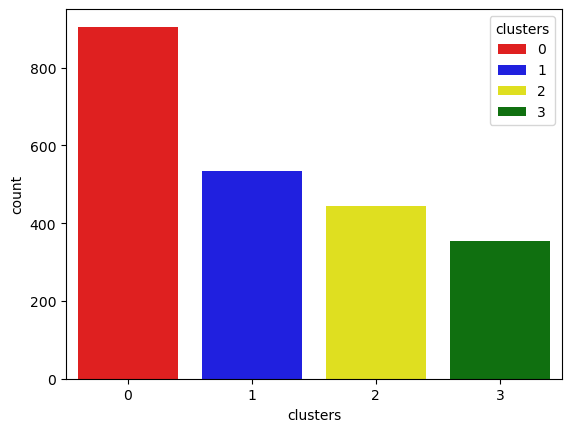

In [97]:
pal=["red","blue","yellow","green"]
sns.countplot(x=X["clusters"],palette=pal,hue=X["clusters"])

<Axes: xlabel='Total_spending', ylabel='Income'>

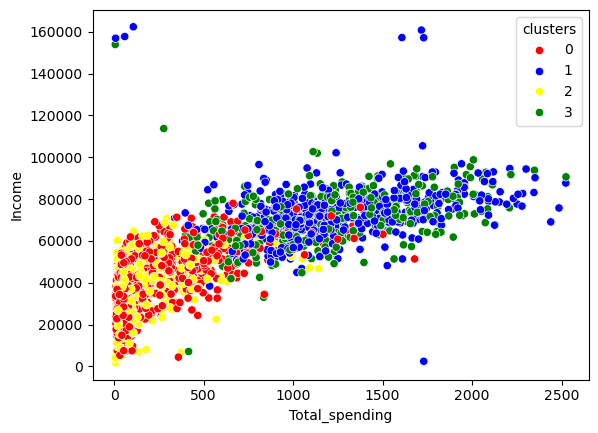

In [98]:
sns.scatterplot(x=X["Total_spending"],y=X["Income"],hue=X["clusters"],palette=pal)

In [99]:
cluster_summary=X.groupby("clusters").mean()

In [100]:
print(cluster_summary)

                Income    Recency  NumDealsPurchases  NumWebPurchases  \
clusters                                                                
0         39680.580110  48.914917           2.594475         3.153591   
1         72808.445693  49.202247           1.958801         5.687266   
2         36960.143018  48.319820           2.594595         2.713964   
3         70722.681303  50.504249           1.855524         5.790368   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
clusters                                                                        
0                    0.969061           4.143646           6.307182  0.011050   
1                    5.498127           8.659176           3.580524  0.005618   
2                    0.837838           3.623874           6.659910  0.011261   
3                    5.014164           8.430595           3.728045  0.005666   

          Response        Age  Customer tenure days  Total_spending  \
clu